# Introduction

This notebook attempts to improve the score from `yu_roger-10906675-week1_randcv_xgb_69051.ipynb` of 0.69051 by using tuning the `scale_pos_weight` parameter.

## Summary
* 

In [9]:
import pandas as pd
import numpy as np
from pathlib import Path
import os
from sklearn.calibration import CalibratedClassifierCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from scipy import stats
from joblib import dump
from joblib import load
import xgboost as xgb
import matplotlib.pyplot as plt
from typing import Dict
from kaggle.api.kaggle_api_extended import KaggleApi
from dotenv import find_dotenv, load_dotenv
from collections import Counter
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from hyperopt import Trials, STATUS_OK, tpe, hp, fmin

from src.data.make_dataset import load_sets, save_sets, save_predictions
from src.models.null import NullModel
from src.visualization.visualize import classification_reports, classification_reports_2
from src.visualization.visualize import plot_pie, create_feature_importance_df, plot_feature_importances


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
load_dotenv(find_dotenv())
api = KaggleApi()
api.authenticate()

In [4]:
competition = os.environ['COMPETITION']

# Set up directories

In [5]:
project_dir = Path.cwd().parent.parent
data_dir = project_dir / 'data'
raw_data_dir = data_dir / 'raw'
interim_data_dir = data_dir / 'interim'
processed_data_dir = data_dir / 'processed'
models_dir = project_dir / 'models'

# Load data

In [6]:
X_train, X_val, y_train, y_val, X_test = load_sets(interim_data_dir)
X_train_lim, X_val_lim, y_train_lim, y_val_lim, X_test_lim = load_sets(interim_data_dir, suffix='top_8_features')
test_id = pd.read_csv(interim_data_dir / 'test_id.csv')

# Baseline

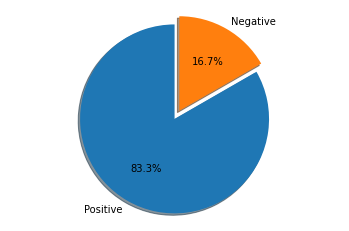

In [9]:
plot_pie(y_train)

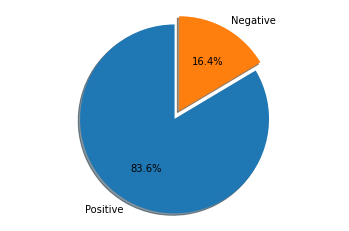

In [10]:
plot_pie(y_val)

## Baseline Score

The baseline is simply the best from the previous attempt of 0.69051.

# Tuning `scale_pos_weight` in `hyperopt`

In [10]:
space = {
    'max_depth' : hp.choice('max_depth', range(5, 20, 1)),
    'learning_rate' : hp.quniform('learning_rate', 0.01, 0.5, 0.05),
    'min_child_weight' : hp.quniform('min_child_weight', 1, 10, 1),
    'subsample' : hp.quniform('subsample', 0.1, 1, 0.05),
    'colsample_bytree' : hp.quniform('colsample_bytree', 0.1, 1.0, 0.05),
    'scale_pos_weight' : hp.uniform('scale_pos_weight', 0, 1)
}

In [12]:
def objective(space):
     xgboost = xgb.XGBClassifier(
         max_depth = int(space['max_depth']),
         learning_rate = space['learning_rate'],
         min_child_weight = space['min_child_weight'],
         subsample = space['subsample'],
         colsample_bytree = space['colsample_bytree'],
         scale_pos_weight=space['scale_pos_weight']
    )
    
    auc = cross_val_score(xgboost, X_train, y_train, cv=10, scoring="auc").mean()

    return{'loss': 1-auc, 'status': STATUS_OK }

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 11)